In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Processed_DatasetsAmount-of Waste-Generated-By-State 32121-0003.csv')

In [3]:
df.head()

,Year,States,Types of Waste,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
0,2004,Baden-Württemberg,Residual household and bulky wastes,1605.6,150.0
1,2004,Baden-Württemberg,Separately collected organic wastes,1220.5,114.0
2,2004,Baden-Württemberg,Separately collected recyclables,1645.3,154.0
3,2004,Baden-Württemberg,Other wastes,9.4,1.0
4,2004,Bayern,Separately collected organic wastes,1677.3,135.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1046 entries, 0 to 1045
Data columns (total 5 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Year                                           1046 non-null   int64  
 1   States                                         1046 non-null   object 
 2   Types of Waste                                 1046 non-null   object 
 3   Total Household Waste Generated (Tons)         1046 non-null   float64
 4   Household Waste Generated per Inhabitant (kg)  1046 non-null   float64
dtypes: float64(2), int64(1), object(2)
memory usage: 41.0+ KB


In [5]:
df.describe()

,Year,Total Household Waste Generated (Tons),Household Waste Generated per Inhabitant (kg)
count,1046.000000,1046.000000,1046.000000
mean,2012.451243,405.893881,110.816904
std,5.181030,462.755575,80.167121
min,2004.000000,0.100000,1.000000
25%,2008.000000,29.400000,21.000000
50%,2012.000000,230.300000,125.000000
75%,2017.000000,613.750000,163.000000
max,2021.000000,1799.100000,349.000000


In [6]:
categorical_vars = df.select_dtypes(include=['object', 'category'])
numerical_vars = df.select_dtypes(include=['int', 'float'])

In [7]:
print("Categorical Variables:")
print(categorical_vars.columns)

print("\nNumerical Variables:")
print(numerical_vars.columns)

Categorical Variables:
Index(['States', 'Types of Waste'], dtype='object')

Numerical Variables:
Index(['Year', 'Total Household Waste Generated (Tons)',
       'Household Waste Generated per Inhabitant (kg)'],
      dtype='object')


In [8]:
# Identify continuous and discrete variables
continuous_vars = []
discrete_vars = []

for column in df.columns:
    if df[column].dtype == 'int64' or df[column].dtype == 'float64':
        if len(df[column].unique()) > 20:
            continuous_vars.append(column)
        else:
            discrete_vars.append(column)

# Print the identified variables
print("Continuous Variables:")
print(continuous_vars)

print("\nDiscrete Variables:")
print(discrete_vars)

Continuous Variables:
['Total Household Waste Generated (Tons)', 'Household Waste Generated per Inhabitant (kg)']

Discrete Variables:
['Year']


In [9]:
# Apply label encoding to the 'Types of Waste' column
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Types of Waste'] = label_encoder.fit_transform(df['Types of Waste'])

# Select the features and target variable
X = df.drop(columns=['Total Household Waste Generated (Tons)'])
y = df['Total Household Waste Generated (Tons)']


In [10]:
dff = df['Types of Waste'].unique()
dff

array([1, 2, 3, 0])

Using LabelEncoder, there are 4 types of waste in the data

In [11]:
from sklearn.ensemble import IsolationForest
X = df[['Household Waste Generated per Inhabitant (kg)']]

model = IsolationForest(contamination=0.05)
model.fit(X)
predictions = model.predict(X)

df['Anomaly'] = predictions

#filter to view the anomalies
anomalies = df[df['Anomaly'] == -1]
print(anomalies.head())

    Year       States  Types of Waste  Total Household Waste Generated (Tons)  \
6   2004       Berlin               1                                   975.0   
7   2004       Berlin               2                                    99.2   
11  2004  Brandenburg               2                                    72.1   
14  2004       Bremen               1                                   167.0   
18  2004      Hamburg               2                                    37.3   

    Household Waste Generated per Inhabitant (kg)  Anomaly  
6                                           288.0       -1  
7                                            29.0       -1  
11                                           28.0       -1  
14                                          252.0       -1  
18                                           21.0       -1  


In [12]:
# clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = df[['Household Waste Generated per Inhabitant (kg)', 'Total Household Waste Generated (Tons)']]

num_clusters = 3

kmeans = KMeans(n_clusters= num_clusters)
kmeans.fit(X)

cluster_assignments = kmeans.labels_
df['Cluster'] = cluster_assignments

/home/ebuka/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


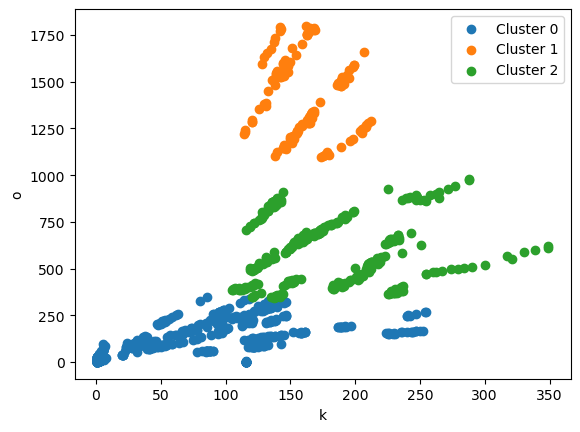

In [13]:
#visualize
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data['Household Waste Generated per Inhabitant (kg)'], cluster_data['Total Household Waste Generated (Tons)'], label=f'Cluster {cluster_id}')
    
    
plt.xlabel('k')
plt.ylabel('o')
plt.legend()
plt.show()

In [14]:
for cluster_id in range(num_clusters):
    cluster_data = df[df['Cluster'] == cluster_id]
    print(f"Cluster {cluster_id}:")
    print(cluster_data.describe())

Cluster 0:
              Year  Types of Waste  Total Household Waste Generated (Tons)  \
count   613.000000      613.000000                              613.000000   
mean   2012.468189        1.185971                               99.562969   
std       5.161229        1.209169                              103.359441   
min    2004.000000        0.000000                                0.100000   
25%    2008.000000        0.000000                                3.800000   
50%    2012.000000        1.000000                               66.700000   
75%    2017.000000        2.000000                              178.200000   
max    2021.000000        3.000000                              349.100000   

       Household Waste Generated per Inhabitant (kg)     Anomaly  Cluster  
count                                     613.000000  613.000000    613.0  
mean                                       65.389040    0.928222      0.0  
std                                        67.312999    0.

In [15]:
#regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Year', 'Household Waste Generated per Inhabitant (kg)']]
y = df['Total Household Waste Generated (Tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [16]:
#evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")

Mean Squared Error: 123320.85550267925
R-squared (R2) Score: 0.35628443000849863


In [17]:
#predict
new_data = pd.DataFrame({'Year': [2040], 'Household Waste Generated per Inhabitant (kg)': [200]})
predicted_waste = model.predict(new_data)
print(f"Predicted Waste for 2023: {predicted_waste[0]} Tons")

Predicted Waste for 2023: 652.6131620514602 Tons


In [20]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



# Select the features (independent variables) and the target (dependent variable)
X = df[['Year', 'Household Waste Generated per Inhabitant (kg)']]
y = df['Total Household Waste Generated (Tons)']

# Linear Regression with Cross-Validation
linear_reg = LinearRegression()
linear_scores = cross_val_score(linear_reg, X, y, cv=5, scoring='neg_mean_squared_error')
linear_mse_scores = -linear_scores  # Convert negative MSE scores to positive

# Decision Tree Regression with Cross-Validation
decision_tree_reg = DecisionTreeRegressor(random_state=42)
tree_scores = cross_val_score(decision_tree_reg, X, y, cv=5, scoring='neg_mean_squared_error')
tree_mse_scores = -tree_scores  # Convert negative MSE scores to positive

# Random Forest Regression with Cross-Validation
random_forest_reg = RandomForestRegressor(random_state=42)
forest_scores = cross_val_score(random_forest_reg, X, y, cv=5, scoring='neg_mean_squared_error')
forest_mse_scores = -forest_scores  # Convert negative MSE scores to positive

# Evaluate the models using cross-validation
def evaluate_cross_val(scores, model_name):
    mse_mean = scores.mean()
    mse_std = scores.std()
    print(f"{model_name} Cross-Validation Mean MSE: {mse_mean}")
    print(f"{model_name} Cross-Validation MSE Standard Deviation: {mse_std}")

print("Linear Regression:")
evaluate_cross_val(linear_mse_scores, "Linear Regression")

print("\nDecision Tree Regression:")
evaluate_cross_val(tree_mse_scores, "Decision Tree Regression")

print("\nRandom Forest Regression:")
evaluate_cross_val(forest_mse_scores, "Random Forest Regression")


Linear Regression:
Linear Regression Cross-Validation Mean MSE: 143176.7854470546
Linear Regression Cross-Validation MSE Standard Deviation: 18253.462573803088

Decision Tree Regression:
Decision Tree Regression Cross-Validation Mean MSE: 228725.13704493572
Decision Tree Regression Cross-Validation MSE Standard Deviation: 51907.79489578168

Random Forest Regression:
Random Forest Regression Cross-Validation Mean MSE: 127681.09484925312
Random Forest Regression Cross-Validation MSE Standard Deviation: 24834.73298039106


In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score



# Select the features (independent variables) and the target (dependent variable)
X = df[['Year', 'Household Waste Generated per Inhabitant (kg)']]
y = df['Total Household Waste Generated (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)

# Lasso Regression (L1 Regularization)
lasso_reg = Lasso(alpha=0.01)  # You can adjust the alpha parameter for regularization strength
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)

# Ridge Regression (L2 Regularization)
ridge_reg = Ridge(alpha=0.1)  # You can adjust the alpha parameter for regularization strength
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R-squared (R2) Score: {r2}")

print("Linear Regression:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

print("\nLasso Regression (L1 Regularization):")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

print("\nRidge Regression (L2 Regularization):")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")


Linear Regression:
Linear Regression Mean Squared Error: 123320.85550267925
Linear Regression R-squared (R2) Score: 0.35628443000849863

Lasso Regression (L1 Regularization):
Lasso Regression Mean Squared Error: 123320.95583088661
Lasso Regression R-squared (R2) Score: 0.3562839063109544

Ridge Regression (L2 Regularization):
Ridge Regression Mean Squared Error: 123320.85774061087
Ridge Regression R-squared (R2) Score: 0.35628441832684576


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score


# Select the features (independent variables) and the target (dependent variable)
X = df[['Year', 'Household Waste Generated per Inhabitant (kg)']]
y = df['Total Household Waste Generated (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest Regression
random_forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_reg.fit(X_train_scaled, y_train)
y_pred_forest = random_forest_reg.predict(X_test_scaled)

# Evaluate the Random Forest model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R-squared (R2) Score: {r2}")

print("Random Forest Regression:")
evaluate_model(y_test, y_pred_forest, "Random Forest Regression")


Random Forest Regression:
Random Forest Regression Mean Squared Error: 142716.05773961198
Random Forest Regression R-squared (R2) Score: 0.2550445090546877


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import uniform, randint
from sklearn.metrics import mean_squared_error, r2_score



# Select the features (independent variables) and the target (dependent variable)
X = df[['Year', 'Household Waste Generated per Inhabitant (kg)']]
y = df['Total Household Waste Generated (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression with Randomized Search
linear_reg = LinearRegression()
param_dist_linear = {}  # No hyperparameters to specify

random_search_linear = RandomizedSearchCV(
    linear_reg, param_distributions=param_dist_linear, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)
random_search_linear.fit(X_train, y_train)
best_linear_reg = random_search_linear.best_estimator_
y_pred_linear = best_linear_reg.predict(X_test)

# Decision Tree Regression with Randomized Search
decision_tree_reg = DecisionTreeRegressor(random_state=42)
param_dist_tree = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 11)
}

random_search_tree = RandomizedSearchCV(
    decision_tree_reg, param_distributions=param_dist_tree, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)
random_search_tree.fit(X_train, y_train)
best_tree_reg = random_search_tree.best_estimator_
y_pred_tree = best_tree_reg.predict(X_test)

# Random Forest Regression with Randomized Search
random_forest_reg = RandomForestRegressor(random_state=42)
param_dist_forest = {
    'n_estimators': randint(50, 201),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 11)
}

random_search_forest = RandomizedSearchCV(
    random_forest_reg, param_distributions=param_dist_forest, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42
)
random_search_forest.fit(X_train, y_train)
best_forest_reg = random_search_forest.best_estimator_
y_pred_forest = best_forest_reg.predict(X_test)

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Mean Squared Error: {mse}")
    print(f"{model_name} R-squared (R2) Score: {r2}")

print("Linear Regression:")
evaluate_model(y_test, y_pred_linear, "Linear Regression")

print("\nDecision Tree Regression:")
evaluate_model(y_test, y_pred_tree, "Decision Tree Regression")

print("\nRandom Forest Regression:")
evaluate_model(y_test, y_pred_forest, "Random Forest Regression")

# Get the best parameters for each model
print("\nBest Parameters:")
print("Linear Regression:", random_search_linear.best_params_)
print("Decision Tree Regression:", random_search_tree.best_params_)
print("Random Forest Regression:", random_search_forest.best_params_)

# Get the best negative MSE scores for each model (negate for positive MSE)
print("\nBest Negative MSE Scores:")
print("Linear Regression:", random_search_linear.best_score_)
print("Decision Tree Regression:", random_search_tree.best_score_)
print("Random Forest Regression:", random_search_forest.best_score_)


/home/ebuka/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 1 is smaller than n_iter=10. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Linear Regression:
Linear Regression Mean Squared Error: 123320.85550267925
Linear Regression R-squared (R2) Score: 0.35628443000849863

Decision Tree Regression:
Decision Tree Regression Mean Squared Error: 148556.8754435846
Decision Tree Regression R-squared (R2) Score: 0.22455635453935108

Random Forest Regression:
Random Forest Regression Mean Squared Error: 121119.1820823258
Random Forest Regression R-squared (R2) Score: 0.3677768207719342

Best Parameters:
Linear Regression: {}
Decision Tree Regression: {'max_depth': 10, 'min_samples_split': 9}
Random Forest Regression: {'max_depth': 20, 'min_samples_split': 9, 'n_estimators': 166}

Best Negative MSE Scores:
Linear Regression: -149148.61166136593
Decision Tree Regression: -123610.4452722087
Random Forest Regression: -99846.78509741502


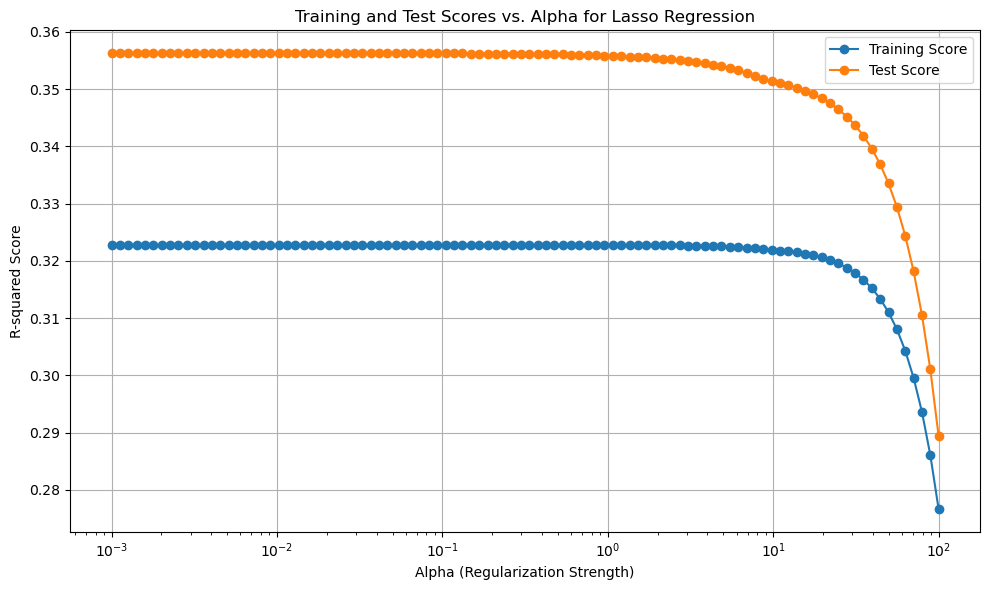

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


# Select the features (independent variables) and the target (dependent variable)
X = df[['Year', 'Household Waste Generated per Inhabitant (kg)']]
y = df['Total Household Waste Generated (Tons)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (Feature Scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a range of alpha values to test
alphas = np.logspace(-3, 2, 100)

# Initialize lists to store training and test scores
train_scores = []
test_scores = []

# Fit Lasso Regression models with different alphas and record scores
for alpha in alphas:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)
    
    # Calculate training and test scores (R-squared in this case)
    train_score = lasso_reg.score(X_train_scaled, y_train)
    test_score = lasso_reg.score(X_test_scaled, y_test)
    
    train_scores.append(train_score)
    test_scores.append(test_score)

# Create a plot to visualize the training and test scores as a function of alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, train_scores, label='Training Score', marker='o', linestyle='-')
plt.plot(alphas, test_scores, label='Test Score', marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Alpha (Regularization Strength)')
plt.ylabel('R-squared Score')
plt.title('Training and Test Scores vs. Alpha for Lasso Regression')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.show()
